# Exercise: Compute inclusion-wise minimal/maximal minimum s-t-cuts
<font color='blue'><b>Goal:</b></font>
Revisit cuts and flows and learn about their structure.

<font color='blue'><b>Python packages required:</b></font>
`networkx`, `pulp`

## Uniqueness of minimal/maximal minimum $s$-$t$ cuts

<font color="blue"><b>Your first task:</b></font> Prove the following two statements about minimum $s$-$t$ cuts in a directed graph $G=(V,A)$ with edge capacities $u\colon A\to\mathbb{Z}_{\geq 0}$, and two distinct vertices $s,t\in V$.

- There is a unique inclusion-wise minimal minimum $s$-$t$ cut in $G$.
- There is a unique inclusion-wise maximal minimum $s$-$t$ cut in $G$.

Note that this is *not* a coding exercise.

## A characterization in terms of residual graphs

<font color="blue"><b>Your second task:</b></font> Prove the following two statements about extremal minimum $s$-$t$ cuts in a directed graph $G=(V,A)$ with edge capacities $u\colon A\to\mathbb{Z}_{\geq 0}$, and two distinct vertices $s,t\in V$.

Let $f$ be a maximum flow in $(G,u)$, let $G_f=(V,B)$ be the corresponding residual graph, and let $U_f:= \{b\in B\colon u_f(b)>0\}$ denote the edges with positive residual capacities.

- Prove that the set of vertices reachable from $s$ in $(V,U_f)$ is the inclusion-wise minimal minimum $s$-$t$ cut.
- Prove that the complement of the set of vertices from which $t$ is reachable in $(V,U_f)$ is the inclusion-wise maximal minimum $s$-$t$ cut.

Note that this is *not* a coding exercise either.

## Finding the minimal/maximal minimum $s$-$t$ cuts

### A toy example
Consider the toy example graph $G$ generated and displayed by the function `toygraph()` in the helper module `extremalMinCuts.py`.

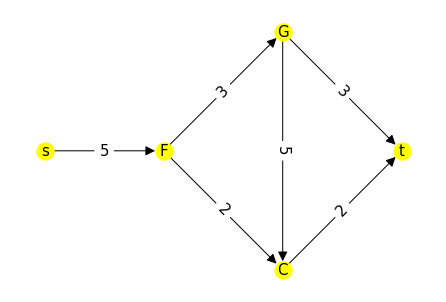

In [1]:
import extremalMinCuts as helpers
%matplotlib inline

# Create and plot a toy graph
G0 = helpers.toygraph()

<font color="blue"><b>Your third task:</b></font> Complete the following by hand:
- Find *all* minimum $s$-$t$ cuts in $G$ with the indicated edge capacities.
- Find the unique minimal and maximal minimum $s$-$t$ cuts in $G$.

### Implementation

<font color="blue"><b>Your fourth task:</b></font> Complete the function `extremal_min_cut(G, s, t, min_or_max)`, where `min_or_max` is set to `"max"` or `"min"` for finding the maximal or minimal minimum $s$-$t$ cut in $G$, respectively.

*Hint: You may want to use `nx.maximum_flow(G, s, t)` to compute a maximum $s$-$t$ flow in $G$, and `nx.descendants(G, v)` as well as `nx.ancestors(G, v)` to compute the subset of vertices of a digraph $G$ that are reachable from $v$ and from which $v$ can be reached, respectively.*

In [28]:
def extremal_min_cut(G, s, t, min_or_max):
    
    ### Implement your function here、
    import networkx as nx
    _, f = nx.maximum_flow(G, "s", "t")
    
    # build residual graph R (contraining all arcs with residual capacity >0)
    R = nx.DiGraph()
    R.add_nodes_from(G.nodes())
    for (u,v) in G.edges:
        if f[u][v] < G[u][v]["capacity"]:
            R.add_edge(u,v)
        if f[u][v] > 0 :
            R.add_edge(v,u)
    
    # find the right vertex sets
    if min_or_max == "min":
        return nx.descendants(R,"s").union("s")
    if min_or_max == "max":
        return R.nodes() - nx.ancestors(R, "t").union("t")

### Testing your implementation
Once your function `extremal_min_cut( )` is complete, you can run the code below to test it.

We start with finding the maximal and minimal minimum $s$-$t$ cuts in the toy example considered above. Note that the code below uses the helper function `draw_cut( )`.

Maximal minimum s-t cut:


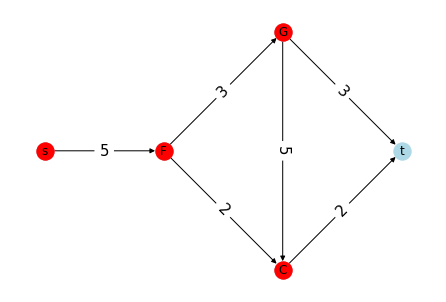

In [18]:
vertex_pos  = {"F": (0, .5), "G": (1, 1), "C": (1, 0), "s": (-1, 0.5), "t": (2, .5)}
print("Maximal minimum s-t cut:")
helpers.draw_cut(G0, extremal_min_cut(G0,"s","t","max"), node_pos = vertex_pos)

Minimal minimum s-t cut:
{'s'}


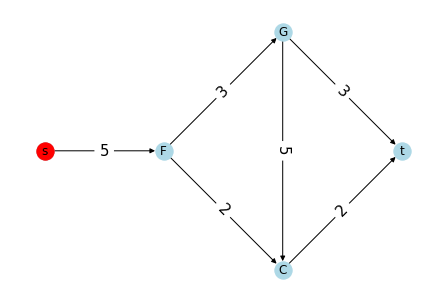

In [19]:
print("Minimal minimum s-t cut:")
print(extremal_min_cut(G0,"s","t","min"))
helpers.draw_cut(G0, extremal_min_cut(G0,"s","t","min"), node_pos = vertex_pos)

There are also helper functions for generating random capacitated graphs on which you can test your approaches.

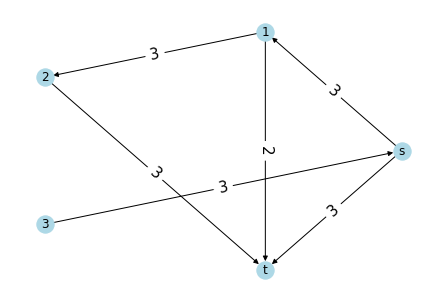

In [21]:
G = helpers.random_graph(5)

Maximal minimum s-t cut


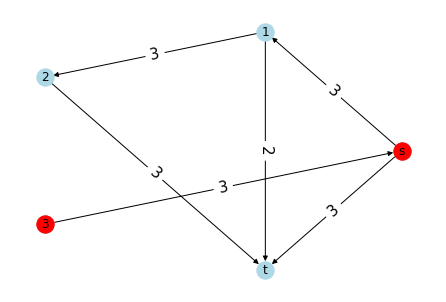

In [27]:
print("Maximal minimum s-t cut")
helpers.draw_cut(G, extremal_min_cut(G, "s", "t", "max"))

Minimal minimum s-t cut


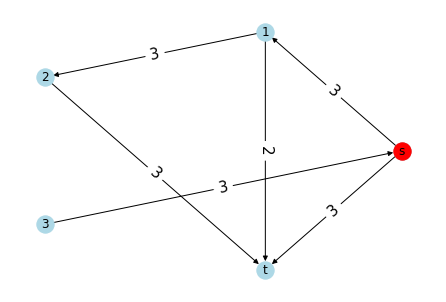

In [29]:
print("Minimal minimum s-t cut")
helpers.draw_cut(G, extremal_min_cut(G, "s", "t", "min"))